## Keras for Deep Learning
<br>
Keras is an open source python module for neural networks. It is a wrapper for popular deep learning modules such as tensorflow or theano that provides intuitive and clean, simple API. The example here is going to be similar to our previous notebook, classify Reuters newswires. Code example is adapted from [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet. 

In [20]:
from keras.datasets import reuters
import numpy as np 
import pandas as pd

max_words = 10000   # top 10000 most common words

Load Reuters newswire data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=max_words)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results 

y_train = to_one_hot(train_labels) # one hot 
y_test = to_one_hot(test_labels) 

### Train Nueral Network with Keras 

Use a fully-connected neural network with one hidden layer and set hyperparameters similar to previous workbook. 

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [17]:
batch_size = 32
epochs = 10
num_classes = 46

In [18]:
model = Sequential()
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 5s 617us/step - loss: 1.5358 - acc: 0.6822 - val_loss: 1.0939 - val_acc: 0.7575
Epoch 2/10
8083/8083 [==============================] - 5s 619us/step - loss: 0.6408 - acc: 0.8635 - val_loss: 0.9386 - val_acc: 0.7953
Epoch 3/10
8083/8083 [==============================] - 5s 560us/step - loss: 0.3663 - acc: 0.9269 - val_loss: 0.8611 - val_acc: 0.8198
Epoch 4/10
8083/8083 [==============================] - 5s 582us/step - loss: 0.2510 - acc: 0.9436 - val_loss: 0.8838 - val_acc: 0.8076
Epoch 5/10
8083/8083 [==============================] - 5s 608us/step - loss: 0.2050 - acc: 0.9532 - val_loss: 0.9112 - val_acc: 0.8065
Epoch 6/10
8083/8083 [==============================] - 5s 670us/step - loss: 0.1800 - acc: 0.9539 - val_loss: 0.9389 - val_acc: 0.8053
Epoch 7/10
8083/8083 [==============================] - 5s 593us/step - loss: 0.1694 - acc: 0.9539 - val_loss: 0.9783 - val_acc: 0.8053
E

In [21]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 196us/step
Test score: 1.0129543437770936
Test accuracy: 0.7974176313446126


### Plot Training and Validation Loss

Loss function for training data should consistently decrease with more epochs. However, loss function for validation data usually displays a local minimum where we trained our optimal model. After minimum loss for validation data, the model starts to overfit.  

In [23]:
import matplotlib.pyplot as plt 

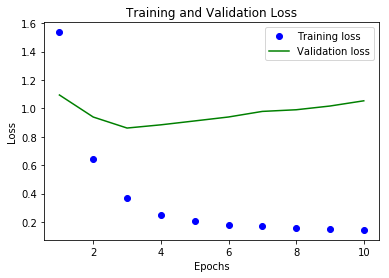

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

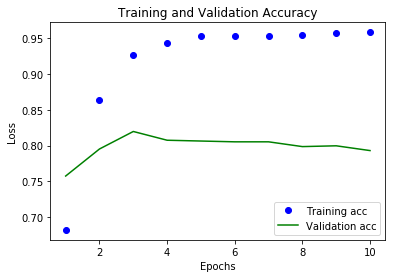

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()